# Overview

This week we'll get started on modern network science. We'll focus on two key results that kick-started a revolution in our understanding of networks.

* Problems with random networks as models for real networks and the Watts-Strogatz model
* Scale-free networks and the Barabasi-Albert model

But before we can get started, there's the bookkeeping stuff, the admin things. Do watch it - the material below tells you about key elements of how to do well in class, assignments and stuff.

And the good news is that after today, we can take it easy with admin stuff for a while. We'll restart this aspect when we get closer to the project assignments that we finish the class with.

# Part 0: The admin stuff 
### (Why we use Peer Evaluations Edition)

We use the system [Peergrade.io](http://peergrade.io/) to get you better feedback and make you smarter. In the video below, I explain why that is the case. There are a lot of good reasons that peer evaluations are great, so watch the video :)

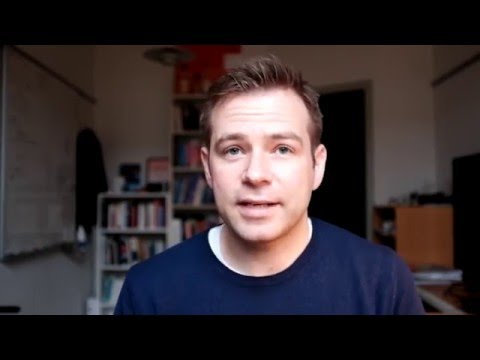

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("-TC18KgpiIQ",width=800, height=450)

# Part 1: Small world networks

Once again, we'll start with some lecturing. So it's time to watch a little video to get you started.

> **_Video Lecture_**: Some properties of real world networks. Clustering and small paths. The Watts-Strogatz model. 
> 

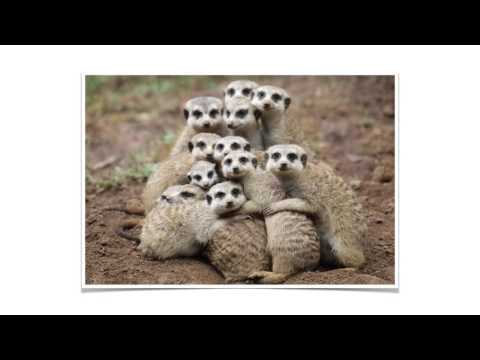

In [ ]:
YouTubeVideo("tMLJ2NYI1FU",width=800, height=450)

Next up is fun with reading the textbook. There's lots of goodies left in Chapter 3 that covers the stuff I've just covered in the video from a slightly different angle. 
> 
> *Reading*: For this part, we'll read the remaining part of *Network Science* Chapter 3, Section 3.5 - 3.10, with ***emphasis*** on 3.8 and 3.9\.
> 


> *Exercises*: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook. 
> 
> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
> * List the four regimes that characterize random networks as a function of $\langle k \rangle$.
> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?
> 

# What's the problem with random networks as a model for real-world networks according to argument 3.5?
The expected number of neighbors in a random network modelling the social network is estamating a considerably lower amount of neighbors (friends, social interactions). The president Roosevelt, had 22000 persons in his appointment book, way below the estimate of $1000 \pm 31$. This might just be an abnormality.

# The four regimes
1. Subcritical $0 < \left<k\right> < 1 (p < 1/N)$
  - The relative size of the largest cluster is a tree wiht size $\left<k\right> < 1$, with a size $N_G ~  \ln N$) and the size of the component increases much slower than the size of the network.
2. Critical point $\left<k\right> (p=1/N)$
  - Point between a giant component and no giant component (Subcritical and Supercritical). At this point the relative size of the largest component is still zero. There is however a significant jump in the size of the largest component $\left< k\right> = 1$. 
3. Supercritical regime $\left< k \right> > 1 (p > 1/N)$
  - This regime is the one most alike a real network, with a giant component that looks like a network. In the vicinity of the critical point the size of the giant componenst varies, as $\frac{N_G}{N} ~ \left< k \right> - 1$ Another way to express this is $N_G ~ (p - p_c)N$ where $p_c \approx \frac{1}{N}$. First formula is only valid in the case where $\left< k \right>$ is close to 1 (the critical point), as the dependence between $N_G$ and $\left< k \right>$ is nonlinear. This regime lasts untill all nodes are connected, in the connected regime. 
4. Connected regime $\left<k\right> = \ln N (p > \frac{\ln N}{N}$
  - When p is sufficiently large, the giant component absorbs all nodes and components. In the absence of isolated nodes the network becomes connected.

# Why is the degree-dependent clustering $C(k)$ a problem in real networks?
The hypothesis does not hold when testing on random networks.



The next set of exercises departs from the book by presenting a little study of the Watts-Strogatz (WS) model. We're going to see just how few random links the WS model needs to dramatically shorten the path-lengths in the network. And while doing that, we'll practice using `networkx`, writing loops, and plotting nice figures.

> *Exercises*: WS edition.
> 
> * First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.
> * Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.
> * Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).
> 

![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ws.png)

In [10]:
import networkx as nx
from networkx.algorithms.shortest_paths.generic import average_shortest_path_length

In [ ]:
N = 500
k = 4
p = [0, 0.1, 1]

graphs = []
for x in p:
  graphs.append((nx.watts_strogatz_graph(N, k, x), x))

In [ ]:
# Average distance based on p
for graph, p in graphs:
  print(f"p={p}, avg shortest: {average_shortest_path_length(graph)}")

p=0, avg shortest: 62.875751503006015
p=0.1, avg shortest: 7.472569138276553
p=1, avg shortest: 4.760705410821643


In [6]:
import numpy as np

In [17]:
ps = np.linspace(0, 1, 50)
N = 500
k = 4
watts_graphs = [nx.watts_strogatz_graph(N, k, p) for p in ps]
random_graphs = [nx.random_graphs.erdos_renyi_graph(N, p) for p in ps]

In [51]:
watts_avgs = np.array([average_shortest_path_length(g) for g in watts_graphs])

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, '<D>')

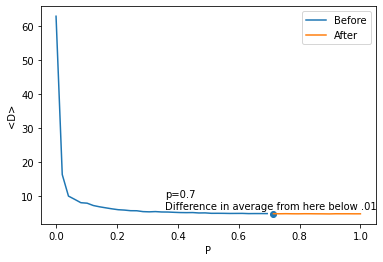

In [76]:
bef_indices = np.nonzero(np.isclose(watts_avgs, watts_avgs[-1], rtol=.01))[0]
aft_indices =  np.nonzero(~np.isclose(watts_avgs, watts_avgs[-1], rtol=.01))[0]

plt.plot(ps[aft_indices], watts_avgs[aft_indices])
plt.plot(ps[bef_indices], watts_avgs[bef_indices])
plt.text(ps[bef_indices[0]]*0.5, watts_avgs[bef_indices[0]]*1.3, f"p={ps[bef_indices[0]]:.1}\nDifference in average from here below .01")
plt.scatter(ps[bef_indices[0]], watts_avgs[bef_indices[0]])

plt.legend(["Before", "After"])


plt.xlabel("P")
plt.ylabel("<D>")


In [79]:
ps = [0, .01, .03, .05, .1, .2]
N = 500
k = 4
networks = np.array([[average_shortest_path_length(nx.watts_strogatz_graph(N, k, p)) for _ in range(50)] for p in ps])

In [84]:
avgs = np.average(networks, axis=1)
stds = np.std(networks, axis=1)

Text(0, 0.5, 'ave(<d>)')

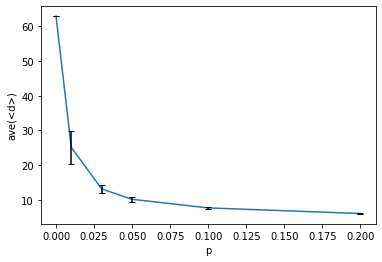

In [95]:
plt.errorbar(ps, avgs, stds, barsabove=True, ecolor="black", capsize=3)

plt.xlabel("p")
plt.ylabel("ave(<d>)")

## Part 2: Scale-free networks

The text book uses two whole chapters on the scale free property. We'll try and power through during the remainder of this lecture. As always, let's start by getting my take on the whole thing.

> **_Video Lecture_**: The scale free property and the Barabasi-Albert Model. 
> 

And now it's time for you guys to read. Recall that Barabasi (who wrote the textbook) discovered power-laws.

> *Reading*: Now we dig into the extended history and and theory behind Scale-Free networks and the Barabasi-Albert Model.
> 
> * Chapter 4, Section 4.1 - 4.7\.
> * Chapter 5, section 5.1 - 5.5\.
> 

> *Exercises*: BA edition.
> 
> First a couple of questions to make sure that you've actually read the text.
> 
> * What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).
> * What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.
> 
> We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success:
> 
> * First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).
> * Now add another node, connecting one of the existing nodes in proportion to their degree.
> * Keep going until you have a 100 node network.
>   * *Hint*: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using `random.choice`) corresponds to selecting a node with probability proportional to it's degree.
> * Plot the network. 
> * Add more nodes until you have a 5000 node network.
> * What's the maximum and minimum degree?
> * Now, bin the degree distribution using `numpy.histogram`.
> * Plot the distribution. Plot it with both linear and log-log axes.
> 
> ![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ba.png)
> 
> Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ has fewer friends than their friends have, on average\*. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:
> 
> * Pick a node $i$ at random (e.g. use `random.choice`). [Find its degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html).
> * Find $i$'s [neighbors](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.neighbors.html?highlight=neighbors#networkx.Graph.neighbors). And calculate their average degree.
> * Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.
> * Do this 1000 times. How many out of those 1000 times is the friendship paradox true?
> 
> Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 
> 
> * Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.
>

# What are the three slope dependent regimes of complex networks with power-law degree distribution?
1. Anomalous Regime $(\gamma) \leq 2$
    - This regime suggests, that the number of links connected to the largest hub grows faster than the size of the network. This means, that for a sufficiently large N, the degree og the largest hub must xceed the total number of nodes in the network, which is not possible.
2. Scale-Free regime ($2 < \gamma < 3$)
3. Random network regime ($\gamma > 3$)

# Three regimes for non-linear preferential attachement


In [27]:
# Creating the Barabasi-Albert model
import networkx as nx
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [51]:
G = nx.Graph()

G.add_nodes_from([0, 1])
G.add_edge(0, 1)

m = 1
size = 5000

for n_id in tqdm(range(2, size+2)):
    new_edges = [(n_id, x) for x in np.random.choice(np.array(G.edges).flatten(), m)]
    G.add_node(n_id)
    G.add_edges_from(new_edges)

100%|██████████| 5000/5000 [00:09<00:00, 521.19it/s]


In [52]:
nodes, degrees = map(list, zip(*G.degree()))

np_deg = np.array(degrees)
print(f"Max degree: {np.max(np_deg)}, Min degree: {np.min(np_deg)}")

Max degree: 108, Min degree: 1


Text(0.5, 1.0, 'Log')

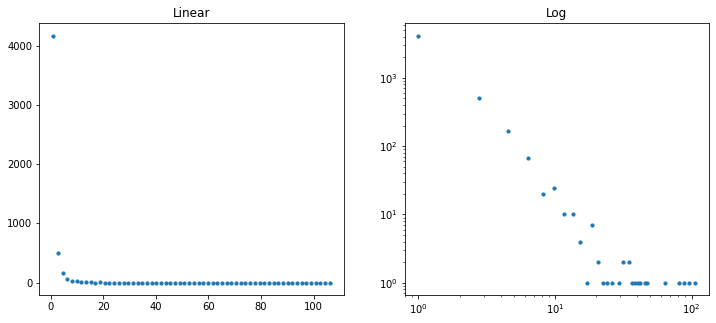

In [53]:
hist = np.histogram(np_deg, bins=60)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(hist[1][:-1], hist[0], s=10)
ax2.scatter(hist[1][:-1], hist[0], s=10)
ax2.set_yscale("log")
ax2.set_xscale("log")

ax1.set_title("Linear")
ax2.set_title("Log")

In [66]:
count = 0
for _ in range(1000):
    n_id = np.random.choice(G.nodes)
    neighbors = G.neighbors(n_id)
    avg_degree = np.average(np.array([G.degree(n) for n in neighbors]))
    if avg_degree > G.degree(n_id): count += 1

print(count)

865
